In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [30]:
df = pd.read_csv("Mental_health_dset.csv") 


In [31]:
df.head(5)

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,weight.gain,material.possessions,introvert,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,Disorder
0,yes,yes,yes,yes,yes,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Anxiety
1,no,no,no,no,no,no,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,Depression
2,no,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,no,no,no,no,no,no,Loneliness
3,no,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,yes,yes,yes,yes,yes,Stress
4,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Normal


In [32]:
import pandas as pd


mapping = {'yes': 1, 'no': 0}


for col in df.columns:
    df[col] = df[col].replace(mapping)

print(df)

C:\Users\HafeezCS\AppData\Local\Temp\ipykernel_9280\1274556580.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)


       feeling.nervous  panic  breathing.rapidly  sweating  \
0                    1      1                  1         1   
1                    0      0                  0         0   
2                    0      0                  0         0   
3                    0      0                  0         0   
4                    0      0                  0         0   
...                ...    ...                ...       ...   
40955                1      1                  1         1   
40956                0      0                  0         0   
40957                0      0                  0         0   
40958                0      0                  0         0   
40959                0      0                  0         0   

       trouble.in.concentration  having.trouble.in.sleeping  \
0                             1                           1   
1                             0                           0   
2                             0                           0   
3  

In [33]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


df['Disorder'] = le.fit_transform(df['Disorder'])


print(df)

       feeling.nervous  panic  breathing.rapidly  sweating  \
0                    1      1                  1         1   
1                    0      0                  0         0   
2                    0      0                  0         0   
3                    0      0                  0         0   
4                    0      0                  0         0   
...                ...    ...                ...       ...   
40955                1      1                  1         1   
40956                0      0                  0         0   
40957                0      0                  0         0   
40958                0      0                  0         0   
40959                0      0                  0         0   

       trouble.in.concentration  having.trouble.in.sleeping  \
0                             1                           1   
1                             0                           0   
2                             0                           0   
3  

In [34]:
df['Disorder'].unique()

array([0, 1, 2, 4, 3])

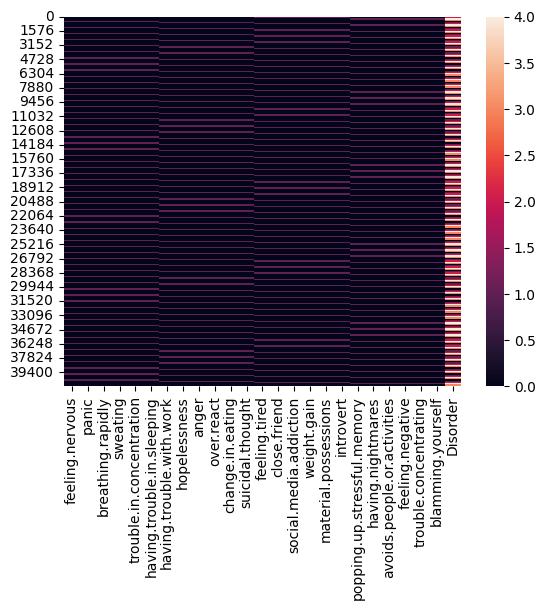

In [35]:
sns.heatmap(df)
plt.show()

<Axes: xlabel='Disorder', ylabel='Count'>

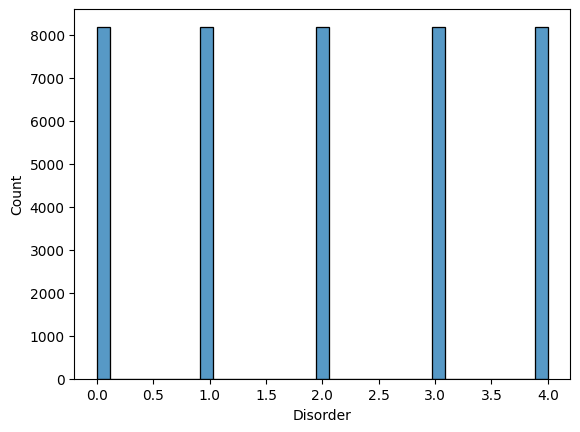

In [36]:
sns.histplot(data=df, x="Disorder")

<Axes: >

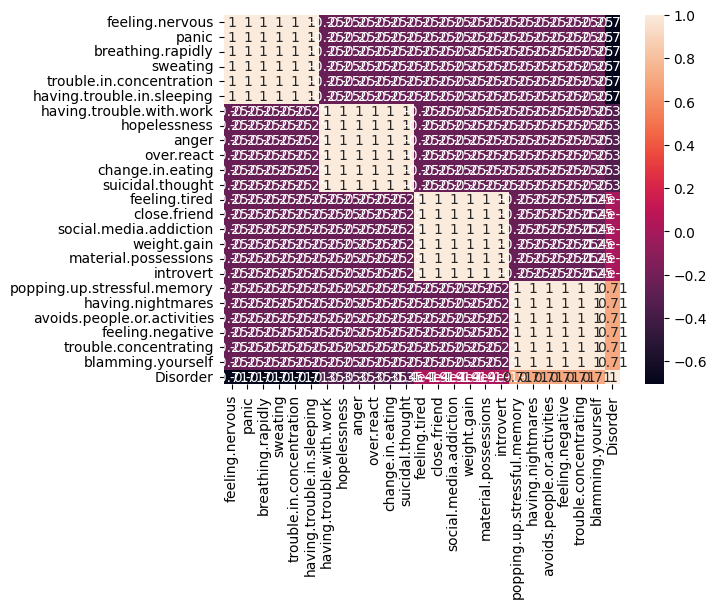

In [37]:
correlation = df.corr()  
sns.heatmap(correlation, annot=True)

<Axes: xlabel='feeling.nervous', ylabel='Disorder'>

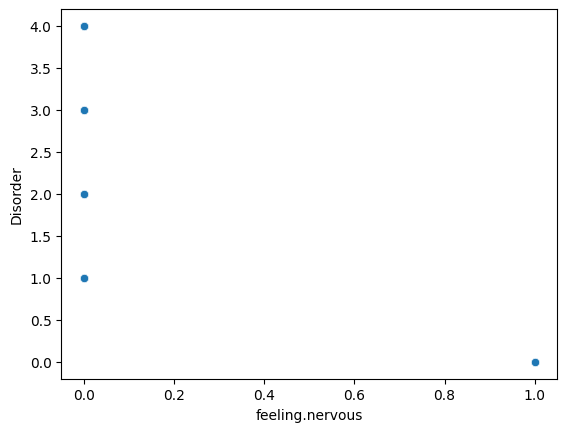

In [38]:
sns.scatterplot(x="feeling.nervous", y="Disorder", data=df)

<Axes: xlabel='panic', ylabel='Disorder'>

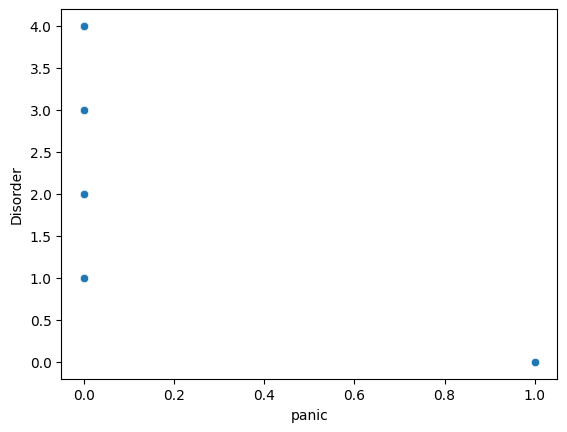

In [39]:
sns.scatterplot(x="panic", y="Disorder", data=df)

<Axes: xlabel='having.trouble.in.sleeping', ylabel='Disorder'>

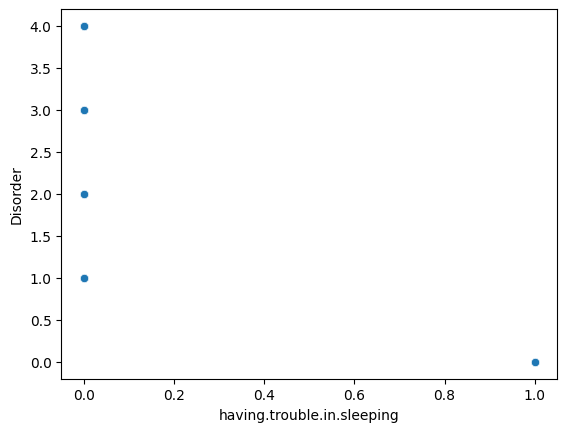

In [40]:
sns.scatterplot(x="having.trouble.in.sleeping", y="Disorder", data=df)


<Axes: xlabel='Disorder', ylabel='having.trouble.in.sleeping'>

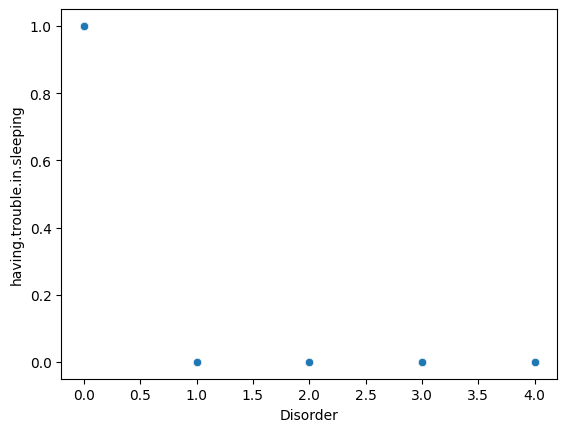

In [41]:
sns.scatterplot(x="Disorder", y="having.trouble.in.sleeping", data=df)


<Axes: xlabel='Disorder', ylabel='panic'>

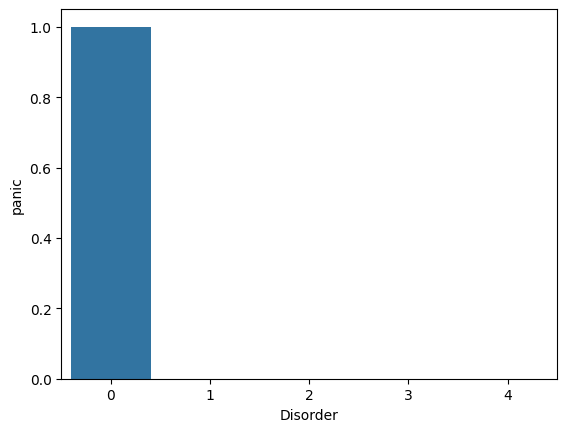

In [42]:
sns.barplot(x="Disorder", y="panic", data=df)

<Axes: xlabel='Disorder', ylabel='having.trouble.in.sleeping'>

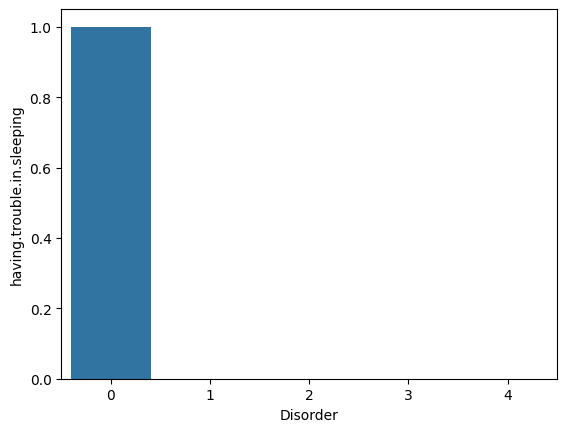

In [43]:
sns.barplot(x="Disorder", y="having.trouble.in.sleeping", data=df)




In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Disorder', axis=1),  
                                                    df['Disorder'],
                                                    test_size=0.4, 
                                                    random_state=42)

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.764269199927925e-31


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}") 

Accuracy: 1.00


In [51]:
import joblib

In [52]:
joblib.dump(model, 'Disorder.joblib')

['Disorder.joblib']

In [53]:
model = joblib.load('Disorder.joblib')

In [54]:
def Disorder(new_data):
    """
    Predict mental health diagnosis for new data.
    
    Parameters:
    new_data (pd.DataFrame): A DataFrame containing the new data for prediction
    
    Returns:
    np.array: Array of predictions
    """
    predictions = model.predict(new_data)
    return predictions

new_data = pd.DataFrame({
    'feeling.nervous': [1],
    'panic': [0],
    'breathing.rapidly': [1],
    'sweating': [0],
    'trouble.in.concentration': [0],
    'having.trouble.in.sleeping': [0],
    'having.trouble.with.work': [0],
    'hopelessness': [0],
    'anger': [0],
    'over.react': [0],
    'change.in.eating': [0],
    'suicidal.thought': [0],
    'feeling.tired': [0],
    'close.friend': [0],
    'social.media.addiction': [0],
    'weight.gain': [0],
    'material.possessions': [0],
    'introvert': [0],
    'popping.up.stressful.memory': [0],
    'having.nightmares': [0],
    'avoids.people.or.activities': [0],
    'feeling.negative': [0],
    'trouble.concentrating': [0],
    'blamming.yourself': [0]
})

# Get predictions
predictions = Disorder(new_data)
print("Predictions:", predictions)

Predictions: [3]


In [55]:


def disorder_prediction(new_data):
    """
    Predict mental health diagnosis for new data.
    
    Parameters:
    new_data (pd.DataFrame): A DataFrame containing the new data for prediction
    
    Returns:
    np.array: Array of predictions
    """
    predictions = model.predict(new_data)
    return predictions

# Example usage
def main():

    new_data = pd.DataFrame({
        'feeling.nervous': [1],
        'panic': [0],
        'breathing.rapidly': [1],
        'sweating': [0],
        'trouble.in.concentration': [0],
        'having.trouble.in.sleeping': [0],
        'having.trouble.with.work': [0],
        'hopelessness': [0],
        'anger': [0],
        'over.react': [0],
        'change.in.eating': [0],
        'suicidal.thought': [0],
        'feeling.tired': [0],
        'close.friend': [0],
        'social.media.addiction': [0],
        'weight.gain': [0],
        'material.possessions': [0],
        'introvert': [0],
        'popping.up.stressful.memory': [0],
        'having.nightmares': [0],
        'avoids.people.or.activities': [0],
        'feeling.negative': [0],
        'trouble.concentrating': [0],
        'blamming.yourself': [0]
    })

    # Get predictions
    predictions = disorder_prediction(new_data)
    print("Predictions:", predictions)

if __name__ == "__main__":
    main()


Predictions: [3]


In [ ]:


def disorder_prediction(new_data):
    """
    Predict mental health diagnosis for new data.
    
    Parameters:
    new_data (pd.DataFrame): A DataFrame containing the new data for prediction
    
    Returns:
    np.array: Array of predictions
    """
    predictions = model.predict(new_data)
    return predictions

def get_user_input():
 
    questions = {
        'feeling.nervous': "Are you feeling nervous? (0 for No, 1 for Yes): ",
        'panic': "Are you experiencing panic? (0 for No, 1 for Yes): ",
        'breathing.rapidly': "Are you breathing rapidly? (0 for No, 1 for Yes): ",
        'sweating': "Are you sweating? (0 for No, 1 for Yes): ",
        'trouble.in.concentration': "Are you having trouble in concentration? (0 for No, 1 for Yes): ",
        'having.trouble.in.sleeping': "Are you having trouble in sleeping? (0 for No, 1 for Yes): ",
        'having.trouble.with.work': "Are you having trouble with work? (0 for No, 1 for Yes): ",
        'hopelessness': "Are you feeling hopelessness? (0 for No, 1 for Yes): ",
        'anger': "Are you feeling anger? (0 for No, 1 for Yes): ",
        'over.react': "Do you over-react? (0 for No, 1 for Yes): ",
        'change.in.eating': "Have you experienced change in eating habits? (0 for No, 1 for Yes): ",
        'suicidal.thought': "Do you have suicidal thoughts? (0 for No, 1 for Yes): ",
        'feeling.tired': "Are you feeling tired? (0 for No, 1 for Yes): ",
        'close.friend': "Do you have a close friend? (0 for No, 1 for Yes): ",
        'social.media.addiction': "Do you have social media addiction? (0 for No, 1 for Yes): ",
        'weight.gain': "Have you experienced weight gain? (0 for No, 1 for Yes): ",
        'material.possessions': "Are you obsessed with material possessions? (0 for No, 1 for Yes): ",
        'introvert': "Are you introverted? (0 for No, 1 for Yes): ",
        'popping.up.stressful.memory': "Are you experiencing popping up stressful memory? (0 for No, 1 for Yes): ",
        'having.nightmares': "Are you having nightmares? (0 for No, 1 for Yes): ",
        'avoids.people.or.activities': "Do you avoid people or activities? (0 for No, 1 for Yes): ",
        'feeling.negative': "Are you feeling negative? (0 for No, 1 for Yes): ",
        'trouble.concentrating': "Are you having trouble concentrating? (0 for No, 1 for Yes): ",
        'blamming.yourself': "Are you blaming yourself? (0 for No, 1 for Yes): "
    }


    user_data = {}
    for feature, question in questions.items():
        response = input(question)
        user_data[feature] = [int(response)]


    new_data = pd.DataFrame(user_data)
    return new_data

def main():
    print("Welcome to the Mental Health Disorder Predictor!")
    
    while True:
        print("\nEnter your symptoms:")
        new_data = get_user_input()


        predictions = disorder_prediction(new_data)
        print("\nPredictions:", predictions)


        choice = input("\nDo you want to continue? (yes/no): ").lower()
        if choice != 'yes':
            break

    print("Thank you for using the Mental Health Disorder Predictor!")

if __name__ == "__main__":
    main()


Welcome to the Mental Health Disorder Predictor!

Enter your symptoms:
